In [4]:
import tellurium as te
import numpy as np
import matplotlib.pyplot as plt

#Quesiton 1:

#Diffeq for A:
#dA/dt = -k2 * AP

#Diffeq for AB:
#dAP/dt = k1 * A

#The sum of the rates of change of A (dA/dt) and AP (dAP/dt) in this  model is equal to zero.
#dA/dt + dAP/dt = -k2 * AP + k1 * A = 0

#In the context of this phosphorylation/dephosphorylation cycle, it suggests that the system has reached an equilibrium where the phosphorylation and dephosphorylation processes are balanced. 
#The concentrations of A and AP are not changing over time, which means that the system has stabilized with a certain distribution of unphosphorylated and phosphorylated proteins.

model = """
    J1: A -> AP; k1 * A;
    J2: AP -> A; k2 * AP;
    
    A = 10;
    k1 = 0.5;
    k2 = 0.3;
"""


r = te.loada(model)


r.steadyState()

# Print the steady-state values of A and AP
print("Steady-State Values:")
print("A =", r.A)
print("AP =", r.AP)

Steady-State Values:
A = 3.749999999999999
AP = 6.250000000000001


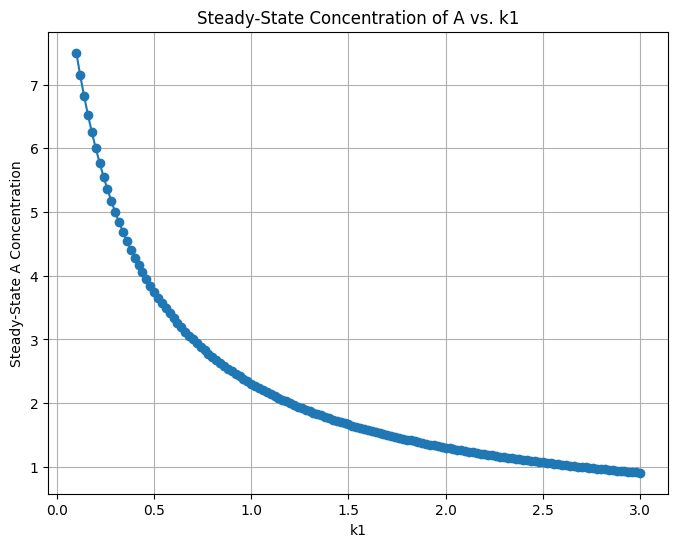

In [6]:
import tellurium as te
import numpy as np
import matplotlib.pyplot as plt

# Define the model with an initialized value for k1
model = """
    J1: A -> AP; k1 * A;
    J2: AP -> A; k2 * AP;
    
    A = 10;
    k1 = 0.5;  # Set an initial value for k1
    k2 = 0.3;
"""

r = te.loada(model)

k1_values = []
A_values = []

k1_range = np.arange(0.1, 3.02, 0.02)

# Iterate through the range of k1 values
for k1 in k1_range:
    r.k1 = k1  # Set the current k1 value
    r.steadyState()  
    k1_values.append(r.k1)
    A_values.append(r.A)

# Plot steady-state concentration of A as a function of k1
plt.figure(figsize=(8, 6))
plt.plot(k1_values, A_values, marker='o', linestyle='-')
plt.xlabel('k1')
plt.ylabel('Steady-State A Concentration')
plt.title('Steady-State Concentration of A vs. k1')
plt.grid(True)
plt.show()


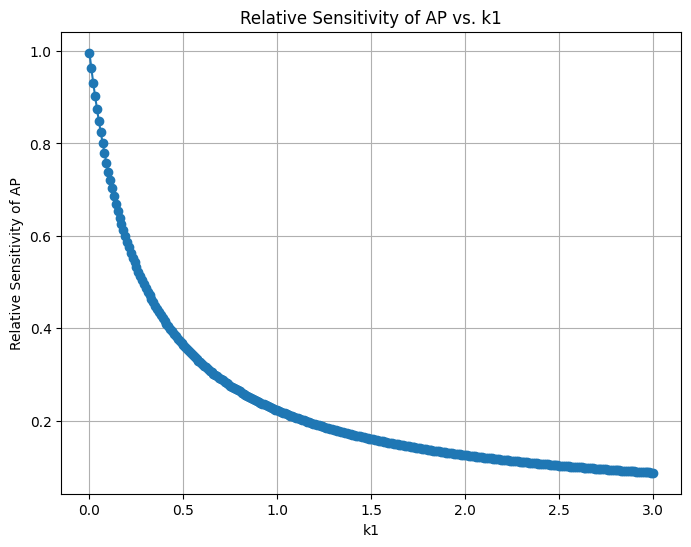

In [7]:
import tellurium as te
import numpy as np
import matplotlib.pyplot as plt

model = """
    J1: A -> AP; k1 * A;
    J2: AP -> A; k2 * AP;
    
    A = 10;
    k2 = 0.3;
    k1 = 0.5;
"""


r = te.loada(model)

# Function to compute the relative sensitivity of AP with respect to k1
def computeSensitivity(roadrunner, k1_value):
    # Store the current k1 value
    original_k1 = roadrunner.k1
    
    # Set the new k1 value
    roadrunner.k1 = k1_value
    
    # Calculate the steady state with the updated k1 value
    roadrunner.steadyState()
    AP = roadrunner.AP
    
    # Calculate the sensitivity using finite differences
    h = 0.05 * k1_value  # Step Size
    roadrunner.k1 = k1_value + h
    roadrunner.steadyState()
    AP_h = roadrunner.AP
    
    sensitivity = ((AP_h - AP) / h) * (k1_value / AP)
    
    # Reset the original k1 value
    roadrunner.k1 = original_k1
    
    return sensitivity

# Range for k1
k1_range = np.arange(0.001, 3.01, 0.01)

sensitivities = []

# Calculate relative sensitivities for each k1 value
for k1_value in k1_range:
    sensitivity = computeSensitivity(r, k1_value)
    sensitivities.append(sensitivity)

# Plot relative sensitivity of AP as a function of k1
plt.figure(figsize=(8, 6))
plt.plot(k1_range, sensitivities, marker='o', linestyle='-')
plt.xlabel('k1')
plt.ylabel('Relative Sensitivity of AP')
plt.title('Relative Sensitivity of AP vs. k1')
plt.grid(True)
plt.show()


The maximum sensitivity value is the highest value observed in the plot.

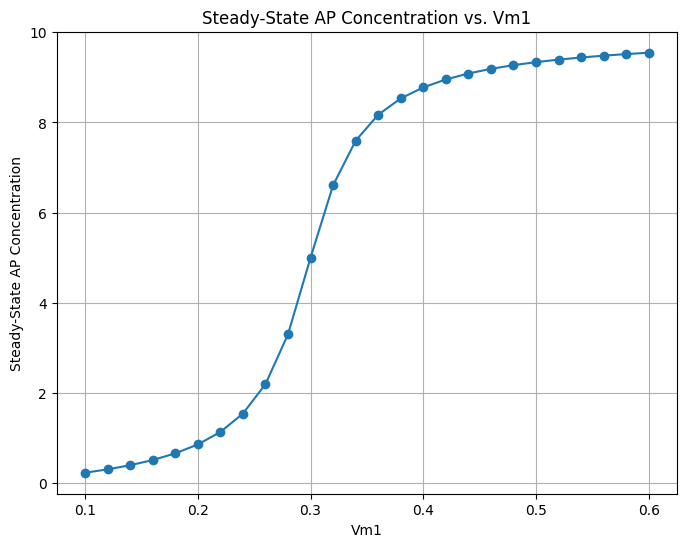

In [8]:
# Question 2:

import tellurium as te
import numpy as np
import matplotlib.pyplot as plt

# Define the model with Michaelis-Menten rate laws
model = """
    J1: A -> AP; Vm1*A/(Km + A);
    J2: AP -> A; Vm2*AP/(Km + AP);
    
    A = 10;
    Vm2 = 0.3;
    Vm1 = 0.5;
    Km = 0.5;
"""

r = te.loada(model)

Vm1_values = []
AP_values = []

Vm1_range = np.arange(0.1, 0.61, 0.02)

# Iterate through the range of Vm1 values
for Vm1_value in Vm1_range:
    r.Vm1 = Vm1_value  # Set the current Vm1 value
    r.steadyState() 
    Vm1_values.append(r.Vm1)
    AP_values.append(r.AP)

# Plot steady-state concentration of AP as a function of Vm1
plt.figure(figsize=(8, 6))
plt.plot(Vm1_values, AP_values, marker='o', linestyle='-')
plt.xlabel('Vm1')
plt.ylabel('Steady-State AP Concentration')
plt.title('Steady-State AP Concentration vs. Vm1')
plt.grid(True)
plt.show()


The curve is an example of a saturation curve, where the reaction rate (concentration of AP in this case) increases with Vm1 but eventually levels off as the system becomes saturated with substrates.

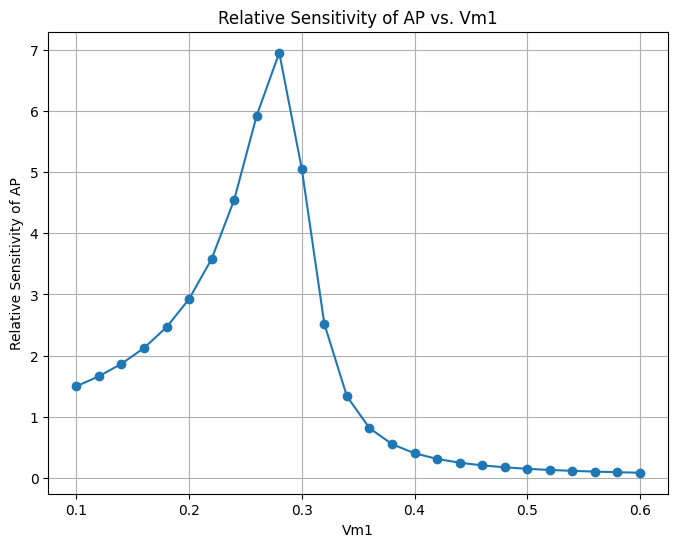

In [9]:
import tellurium as te
import numpy as np
import matplotlib.pyplot as plt

# Define the model with Michaelis-Menten rate laws and Km = 0.5
model = """
    J1: A -> AP; Vm1*A/(Km + A);
    J2: AP -> A; Vm2*AP/(Km + AP);
    
    A = 10;
    Vm2 = 0.3;
    Vm1 = 0.5;
    Km = 0.5;
"""


r = te.loada(model)

# Function to compute the relative sensitivity of AP with respect to Vm1
def computeSensitivity(roadrunner, Vm1_value):
    # Store the current Vm1 value
    original_Vm1 = roadrunner.Vm1
    
    # Set the new Vm1 value
    roadrunner.Vm1 = Vm1_value
    
    # Calculate the steady state with the updated Vm1 value
    roadrunner.steadyState()
    AP = roadrunner.AP
    
    # Calculate the sensitivity using finite differences
    h = 0.05 * Vm1_value  
    roadrunner.Vm1 = Vm1_value + h
    roadrunner.steadyState()
    AP_h = roadrunner.AP
    
    sensitivity = ((AP_h - AP) / h) * (Vm1_value / AP)
    
    # Reset the original Vm1 value
    roadrunner.Vm1 = original_Vm1
    
    return sensitivity


sensitivities = []

Vm1_range = np.arange(0.1, 0.61, 0.02)

# Calculate relative sensitivities for each Vm1 value
for Vm1_value in Vm1_range:
    sensitivity = computeSensitivity(r, Vm1_value)
    sensitivities.append(sensitivity)

# Plot relative sensitivity of AP as a function of Vm1
plt.figure(figsize=(8, 6))
plt.plot(Vm1_range, sensitivities, marker='o', linestyle='-')
plt.xlabel('Vm1')
plt.ylabel('Relative Sensitivity of AP')
plt.title('Relative Sensitivity of AP vs. Vm1')
plt.grid(True)
plt.show()


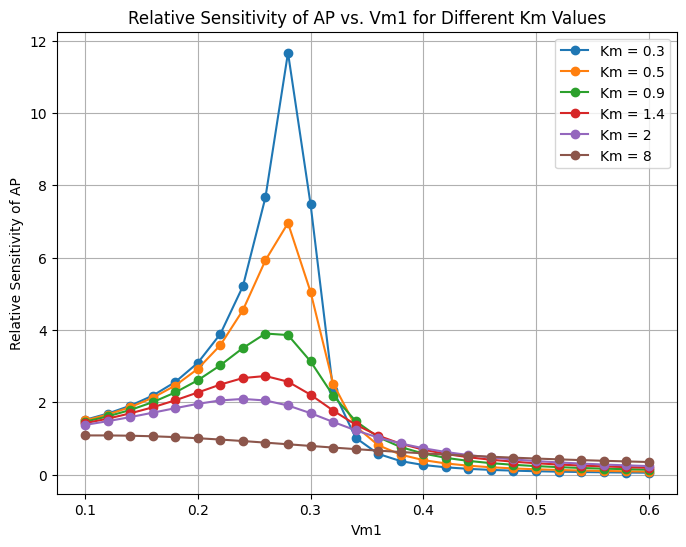

In [14]:
import tellurium as te
import numpy as np
import matplotlib.pyplot as plt

model = """
    J1: A -> AP; Vm1*A/(Km + A);
    J2: AP -> A; Vm2*AP/(Km + AP);
    
    A = 10;
    Vm2 = 0.3;
    Vm1 = 0.5;
    Km = 0.5;
"""

r = te.loada(model)

# Function to compute the relative sensitivity of AP with respect to Vm1
def computeSensitivity(roadrunner, Vm1_value):
    # Store the current Vm1 value
    original_Vm1 = roadrunner.Vm1
    
    # Set the new Vm1 value
    roadrunner.Vm1 = Vm1_value
    
    roadrunner.steadyState()
    AP = roadrunner.AP
    
    h = 0.05 * Vm1_value  
    roadrunner.Vm1 = Vm1_value + h
    roadrunner.steadyState()
    AP_h = roadrunner.AP
    
    sensitivity = ((AP_h - AP) / h) * (Vm1_value / AP)
    
    # Reset the original Vm1 value
    roadrunner.Vm1 = original_Vm1
    
    return sensitivity

sensitivities_dict = {}

Vm1_range = np.arange(0.1, 0.61, 0.02)

Km_values = [0.3, 0.5, 0.9, 1.4, 2, 8]

# Calculate relative sensitivities for each Km value and store them in the dictionary
for Km in Km_values:
    r.Km = Km  
    sensitivities = []
    for Vm1_value in Vm1_range:
        sensitivity = computeSensitivity(r, Vm1_value)
        sensitivities.append(sensitivity)
    sensitivities_dict[Km] = sensitivities

# Plot relative sensitivities as a function of Vm1 for different Km values
plt.figure(figsize=(8, 6))
for Km, sensitivities in sensitivities_dict.items():
    plt.plot(Vm1_range, sensitivities, marker='o', linestyle='-', label=f'Km = {Km}')
plt.xlabel('Vm1')
plt.ylabel('Relative Sensitivity of AP')
plt.title('Relative Sensitivity of AP vs. Vm1 for Different Km Values')
plt.grid(True)
plt.legend()
plt.show()


As the Km value is reduced (i.e., as Km becomes smaller), the sensitivity of the system increases. This means that the system becomes more sensitive to changes in Vm1 when Km is lower.

At low Km values, the sensitivity can indeed exceed 1.0. This indicates that small changes in Vm1 can lead to relatively larger changes in the steady-state concentration of AP. The sensitivity exceeding 1.0 suggests a strong response of the system to variations in Vm1.

Overall, the system becomes more sensitive at low Km values, which means that it becomes more responsive to changes in Vm1. Lower Km values indicate a higher affinity of the enzyme for its substrate, which results in a more pronounced response to changes in the turnover rate of Vm1
.